# Adam Ledet
**Github Page**: https://github.com/adamledet/itds-project-2025

**Website**: https://adamledet.github.io/itds-project-2025/

My first few code blocks set everything up to properly manipulate the datasets. Before doing anything, I need to get my API key to use Kaggle as this is my primary dataset source. I upload the file from my computer each time rather than linking it to my Google Drive.

In [3]:
# Install Kaggle and upload your API key.
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"adamledet","key":"9f5e44bbd95759f9049ca793c04da24f"}'}

In [4]:
# Make a Kaggle directory and give permission to edit it.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
atharvasoundankar/chocolate-sales                                      Chocolate Sales Data 📊🍫                              63KB  2025-03-07 05:44:03           5643         81  1.0              
abdulmalik1518/mobiles-dataset-2025                                    Mobiles Dataset (2025)                               20KB  2025-02-18 06:50:24          12506        222  1.0              
atharvasoundankar/global-music-streaming-trends-and-listener-insights  Global Music Streaming Trends & Listener Insights    95KB  2025-03-09 05:12:00           

Next I actually get the datasets I'll be using. These datasets are https://www.kaggle.com/datasets/joebeachcapital/top-1000-steam-games and https://www.kaggle.com/datasets/trolukovich/steam-games-complete-dataset. The older dataset I call **df_Old** while I call the newer dataset **df_New**.
For this first milestone, I'll be exclusively working with the 'New' dataframe as I ran into a few problems manipulating data with the old one. That said, i'll still load it.

## Purpose Statement:
The goal of this project is to determine what variables contribute to a game's sale success. Important variables to keep track of include:
*   User Sentiment (Positive and Regative reviews)
*   Peak CCU (the most Concurrent players the game has ever had)
*   Price (this is important as a cheat game that sells well can gross less than an expensive game that sells fewer copies)
*   Date (I'm interested in this to initially see if the time of year in which a game is released can influence any of the above).

In [5]:
# Get two datasets
import kagglehub
! kaggle datasets download 'joebeachcapital/top-1000-steam-games' # 93182 Steam Games
! kaggle datasets download 'trolukovich/steam-games-complete-dataset' # Steam games complete dataset
! mkdir steamNew
! mkdir steamOld
! unzip /content/top-1000-steam-games.zip -d steamNew
! unzip /content/steam-games-complete-dataset.zip -d steamOld

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/top-1000-steam-games
License(s): CC0-1.0
top-1000-steam-games.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/trolukovich/steam-games-complete-dataset
License(s): CC0-1.0
steam-games-complete-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘steamNew’: File exists
mkdir: cannot create directory ‘steamOld’: File exists
Archive:  /content/top-1000-steam-games.zip
replace steamNew/93182_steam_games.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: steamNew/93182_steam_games.csv  A

  inflating: steamNew/steam_app_data.csv  A

  inflating: steamNew/steamspy_data.csv  
Archive:  /content/steam-games-complete-dataset.zip
replace steamOld/steam_games.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: steamOld/steam_games.csv  


In [6]:
import pandas as pd
import numpy as np

In [7]:
df_New = pd.read_csv("/content/steamNew/93182_steam_games.csv")
df_New.head()

<ipython-input-7-844d21ff1713>:1: DtypeWarning: Columns (3,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_New = pd.read_csv("/content/steamNew/93182_steam_games.csv")


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,1424640,余烬,"Oct 3, 2020",20000 - 50000,0,0,3.99,0,'Ashes of war' is an anti war theme adventure ...,['Simplified Chinese'],...,0,0,0,宁夏华夏西部影视城有限公司,宁夏华夏西部影视城有限公司,"Single-player,Family Sharing","Adventure,Casual,Indie,RPG","Sokoban,RPG,Puzzle-Platformer,Exploration,Adve...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
1,402890,Nyctophilia,"Sep 23, 2015",50000 - 100000,0,0,0.00,0,NYCTOPHILIA Nyctophilia is an 2D psychological...,"['English', 'Russian']",...,0,0,0,Cat In A Jar Games,Cat In A Jar Games,Single-player,"Adventure,Free To Play,Indie","Free to Play,Indie,Adventure,Horror,2D,Pixel G...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
2,1151740,Prison Princess,"Apr 2, 2020",0 - 20000,0,0,19.99,0,"ABOUT Now nothing more than a phantom, can the...","['English', 'Simplified Chinese', 'Traditional...",...,0,0,0,qureate,qureate,"Single-player,Steam Achievements,Full controll...","Adventure,Indie","Sexual Content,Adventure,Indie,Nudity,Anime,Ma...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
3,875530,Dead In Time,"Oct 12, 2018",0 - 20000,0,0,7.99,0,Is a hardcore action with a non-trivial level ...,"['English', 'Russian']",...,0,0,0,Zelenov Artem,Zelenov Artem,"Single-player,Full controller support,Family S...","Action,Indie","Action,Indie,Souls-like,Fantasy,Early Access,R...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
4,1835360,Panacle: Back To Wild,"Mar 11, 2022",0 - 20000,2,0,3.99,0,Panacle: Back to the Wild is a indie card game...,"['English', 'Japanese', 'Simplified Chinese', ...",...,0,0,0,渡鸦游戏,"渡鸦游戏,电钮组","Single-player,Family Sharing","Indie,Strategy,Early Access","Trading Card Game,Turn-Based Strategy,Lore-Ric...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...


In [8]:
# df_Old is the older Steam dataset
df_Old = pd.read_csv("/content/steamOld/steam_games.csv")
df_Old.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


At this point I can actually start manipulating my data and getting results. The first thing I want to do is look through my datasets and make a correlation matrix with all my integers. This is an initial step to test my variables and see if there are any surprising results. My initial expectation was that there would be few correlations between the integer data, and any that do appear will be by product of chance.

In [9]:
# Get correlation matrix for integer values and return matrix only with values greater than the threshold (and excluding self, which would have a correlation of 1)
# Threshold currently set at 0.4
thresh = 0.4
df_New_CorrMatrix = df_New[["Peak CCU", "Required age", "Price", "DLC count", "Metacritic score", "User score", "Positive", "Negative", "Score rank", "Achievements", "Recommendations", "Average playtime forever", "Average playtime two weeks", "Median playtime two weeks"]].corr()
df_New_CorrMatrix[df_New_CorrMatrix[df_New_CorrMatrix>thresh] < 1]

,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime two weeks
Peak CCU,NaN,NaN,NaN,NaN,NaN,NaN,0.715739,0.54617,NaN,NaN,NaN,NaN,NaN,NaN
Required age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DLC count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metacritic score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.842230,NaN,NaN,NaN,NaN,NaN
Positive,0.715739,NaN,NaN,NaN,NaN,NaN,NaN,0.73174,NaN,NaN,NaN,NaN,NaN,NaN
Negative,0.546170,NaN,NaN,NaN,NaN,NaN,0.731740,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Score rank,NaN,NaN,NaN,NaN,NaN,0.84223,NaN,NaN,NaN,0.590452,NaN,NaN,NaN,NaN
Achievements,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.590452,NaN,NaN,NaN,NaN,NaN


In the New dataset, there are strongest correlations between:


*   Peak CCU (Peak Concurrent Users) and Positive / Negative reviews
*   Positive Reviews and Negative reviews
*   Score rank and number of achievements

It makes logical sense for there to be a correlation between positive and negative reviews with well-liked games receiving more positive and fewer negative reviews. The same is true for a popular game to have more players while more negatively reviewed games have fewer peak players. Sadly, the dataset doesn't have working data for the average playtime as these values would be interesting to see.
A variable that IS available is the date in which the game is published, but this is an object type. Before I can use a correlation matrix, I need to change the date to a numeral. I'll first convert each date into a number between 1 and 12 to represent the months and then see if there are any new correlations.

In [11]:
# Map months to numbers and set type to int
df_New["Release date"] = df_New["Release date"].str[:3]
df_New["Release date"] = df_New["Release date"].map({
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12,
})
df_New["Release date"] = df_New["Release date"].astype(int)
df_New["Release date"]

,Release date
0,10
1,9
2,4
3,10
4,3
...,...
93177,1
93178,10
93179,9
93180,1


In [12]:
# Rerun correlation matrix without any threshold to see true data
thresh = 0
df_New_CorrMatrix = df_New[["Peak CCU", "Required age", "Price", "DLC count", "Metacritic score", "User score", "Positive", "Negative", "Score rank", "Achievements", "Recommendations", "Release date"]].corr()
df_New_CorrMatrix[df_New_CorrMatrix[df_New_CorrMatrix>thresh] < 1]

,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Release date
Peak CCU,NaN,0.038508,0.026504,0.012801,0.054676,NaN,0.715739,0.546170,0.243181,0.009572,0.151234,0.006413
Required age,0.038508,NaN,0.087940,0.015046,0.213118,NaN,0.065936,0.088727,NaN,0.007719,0.115893,0.002792
Price,0.026504,0.087940,NaN,0.035064,0.129061,0.000856,0.030463,0.035269,0.078160,0.010913,0.044904,0.011499
DLC count,0.012801,0.015046,0.035064,NaN,0.025752,NaN,0.018466,0.021718,0.400000,0.034608,0.021584,0.005756
Metacritic score,0.054676,0.213118,0.129061,0.025752,NaN,NaN,0.083718,0.059365,NaN,0.019506,0.118230,0.005346
User score,NaN,NaN,0.000856,NaN,NaN,NaN,0.000319,NaN,0.842230,0.000473,NaN,0.009128
Positive,0.715739,0.065936,0.030463,0.018466,0.083718,0.000319,NaN,0.731740,0.240347,0.016174,0.260884,0.005108
Negative,0.546170,0.088727,0.035269,0.021718,0.059365,NaN,0.731740,NaN,NaN,0.014221,0.225855,0.010368
Score rank,0.243181,NaN,0.078160,0.400000,NaN,0.842230,0.240347,NaN,NaN,0.590452,0.263352,NaN
Achievements,0.009572,0.007719,0.010913,0.034608,0.019506,0.000473,0.016174,0.014221,0.590452,NaN,0.013037,NaN


Well, okay....it looks like there is no meaningful correlation between a game's release date and any of our other numeric variables. At least that's some knowledge..! This isn't particularly useful, so I may go back to the drawing board as my primary hypothesis was that a game's release date would correlate to its popularity; but it appears to have no impact whatsoever on the Peak CCU..!

To show that I have a robust number of games released in different dates, I'll plot a bar graph to show the release dates of games in my dataset.

In [13]:
import matplotlib.pyplot as plt

In [19]:
# Sort values (so that graph displays monthly data cleanly)
df_New = df_New.sort_values(by=["Release date"])
df_New["Release date"]

,Release date
46590,1
41829,1
71230,1
71231,1
14261,1
...,...
2884,12
46982,12
46972,12
46946,12


In [20]:
# I should probably make a function to convert months to numbers and back since I seem to be doing this repeatedly
df_New["Release date"] = df_New["Release date"].map({
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
})

<Axes: xlabel='Release date'>

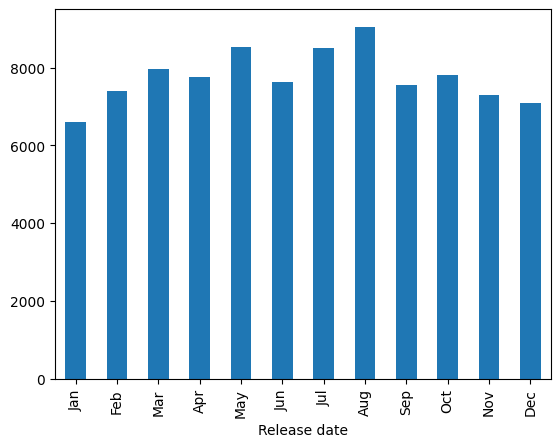

In [21]:
df_New["Release date"].value_counts(sort=False).plot.bar()

## Next Steps

With my initial hypothesis 'out the window' as it were, perhaps I can draw correlations to other data or use other datasets. I still have my df_Old which contains information about price. I also found a new dataset (placeholder called 'd3') which contains information about recent games' revenue.

I may also be able to see patterns between different publishers or draw lines between the correlations I do find (such as between positive and negative reviews and Peak CCU).

For now, I fear I'm still in the 'aimless wandering' phase of trying to figure out what I can prove or point to as relating to a successful game. The only thing I can say for now is that player sentiment does not appear to be based on a game's release date.

In [29]:
# df_3 is a new dataset I found and from which I may be able to gleam interesting data
! kaggle datasets download 'alicemtopcu/top-1500-games-on-steam-by-revenue-09-09-2024' # Steam games complete dataset
! unzip /content/top-1500-games-on-steam-by-revenue-09-09-2024.zip -d d3
df_3 = pd.read_csv("/content/d3/Steam_2024_bestRevenue_1500.csv")
df_3.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830
